# Supervised Learning: Support Vector Machine - SVM (Project)

------
## Table of Contents

[1. Import libraries](#1.-Import-libraries)

[2. Support Vector Machine: SVM Classification](#2.-Support-Vector-Machine:-SVM-Classification)
 - [2.1. Loading the Dataset](#2.1.-Loading-the-Dataset)
 - [2.2. Training and Testing Data](#2.2.-Training-and-Testing-Data)
 - [2.3. Model Training without Hypeparameter Tuning](#2.3.-Model-Training-without-Hypeparameter-Tuning)
 - [2.4. Hyperparameter Tuning: GridSearch](#2.4.-Hyperparameter-Tuning:-GridSearch)
 - [2.5. Model Evaluation](#2.5.-Model-Evaluation)
   
[3. Support Vector Machine: SVM Regression](#3.-Support-Vector-Machine:-SVM-Regression)
 - [3.1. Loading the Dataset](#3.1.-Loading-the-Dataset)
 - [3.2. Training and Testing Data](#3.2.-Training-and-Testing-Data)
 - [3.3. Model Training and Evaluation](#3.3.-Model-Training-and-Evaluation)

------
## I. Import libraries



In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy as pts 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Support Vector Machine: SVM Classification

## 2.1. Loading the Dataset

In [2]:
# Loading the data
with open('data/adult_income.pickle', 'rb') as to_read:
    data = pd.read_pickle(to_read)

data.tail(n=3)

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
3997,25,Private,211424,Bachelors,13,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
3998,48,Federal-gov,435503,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
3999,47,Private,97842,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


## 2.2. Training and Testing Data

In [3]:
# Create label column, one for >50K, zero otherwise.
data['Label'] = data['Salary'].map(lambda x : 1 if '>50K' in x else 0)

# Create dependent and independent variables
formula = 'Label ~ Age + HoursPerWeek + CapitalGain + C(Sex) + C(MaritalStatus) + C(Relationship)'
y, X = pts.dmatrices(formula, data=data, return_type='dataframe')

X.sample(5)

,Intercept,C(Sex)[T. Male],C(MaritalStatus)[T. Married-AF-spouse],C(MaritalStatus)[T. Married-civ-spouse],C(MaritalStatus)[T. Married-spouse-absent],C(MaritalStatus)[T. Never-married],C(MaritalStatus)[T. Separated],C(MaritalStatus)[T. Widowed],C(Relationship)[T. Not-in-family],C(Relationship)[T. Other-relative],C(Relationship)[T. Own-child],C(Relationship)[T. Unmarried],C(Relationship)[T. Wife],Age,HoursPerWeek,CapitalGain
3279,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,53.0,0.0
635,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0,40.0,0.0
1422,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,50.0,7688.0
3802,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,40.0,0.0
151,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0,40.0,0.0


In [4]:
# Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

# Standardize data
sc = StandardScaler().fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

## 2.3. Model Training without Hypeparameter Tuning

In [26]:
# SVM: Kernel comparison 

#Define the kernels and titles
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
titles = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel', 'Sigmoid Kernel']

# Use a list to store the results before creating the DataFrame
results_list = []

# Loop through each kernel type
for i, kernel in enumerate(kernels):
    # Initialize and train the SVM with the current kernel
    if kernel == 'poly':
        # For 'poly' kernel - specify the degree
        model = SVC(kernel=kernel, degree=3, C=1.0)
    else:
        model = SVC(kernel=kernel, C=1.0)

    # Fit the model
    model.fit(X_train_sc, y_train)


    # Compute and display accuracy score
    accuracy_score = model.score(X_test_sc, y_test)
    # print(f"Kernel = {kernel}, SVM prediction accuracy = {accuracy_score:.2%}")

    # Append results to the list
    results_list.append({
        'Kernel': titles[i],
        'Accuracy Score': round(accuracy_score, 3)
    })

# Create the DataFrame from the list of results after the loop
accuracy = pd.DataFrame(results_list)

print(accuracy)

              Kernel  Accuracy Score
0      Linear Kernel           0.798
1  Polynomial Kernel           0.778
2         RBF Kernel           0.797
3     Sigmoid Kernel           0.760


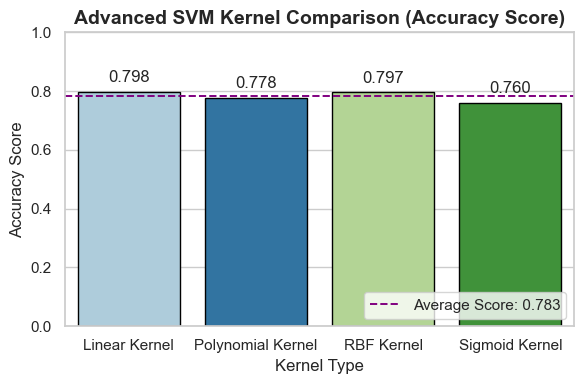

In [33]:
# SVM Kernel Comparison Plot

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))

ax = sns.barplot(x='Kernel', y='Accuracy Score', data=accuracy, palette='Paired', edgecolor='black')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

average_score = accuracy['Accuracy Score'].mean()
ax.axhline(average_score, color='purple', linestyle='--', linewidth=1.4, label=f'Average Score: {average_score:.3f}')

ax.set_title('Advanced SVM Kernel Comparison (Accuracy Score)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1) 
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_xlabel('Kernel Type', fontsize=12)
ax.legend(loc='lower right') 
plt.tight_layout()
plt.show()

In [33]:
# SVM: Linear kernel
svc = SVC(kernel='linear', random_state=23)
svc.fit(X_train_sc, y_train)

# Prediction on test data
y_pred = svc.predict(X_test_sc)

# Classification Report
labels = ['Low', 'High']

print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

         Low       0.79      0.99      0.88      1211
        High       0.85      0.21      0.33       389

    accuracy                           0.80      1600
   macro avg       0.82      0.60      0.61      1600
weighted avg       0.81      0.80      0.75      1600



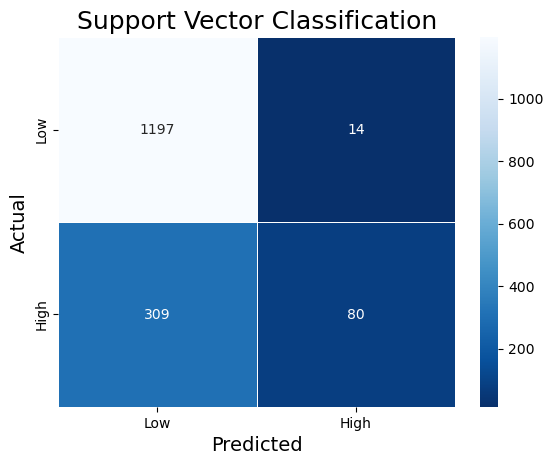

In [32]:
# Confusion Matrix

def confusion_matrix_plot(test, predict, labels, title='Confusion Matrix'):

    bins = len(labels)
    pts, xe, ye = np.histogram2d(test, predict, bins)

    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels)
    
    hm = sns.heatmap(pd_pts, annot=True, fmt=".0f", linewidths=.6, cmap='Blues_r')    
    hm.axes.set_title(title, fontsize=18)
    hm.axes.set_xlabel('Predicted', fontsize=14)
    hm.axes.set_ylabel('Actual', fontsize=14)
    
    return None

# Confusion Matrix Plot
confusion_matrix_plot(y_test['Label'], y_pred, labels, 'Support Vector Classification')

## 2.4. Hyperparameter Tuning: GridSearch

In [ ]:
# Hyperparameters
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, verbose = 3)

grid.fit(X_train_sc, y_train)

## 2.5. Model Evaluation

In [11]:
# Optimized model: Evaluation
grid_prediction = grid.predict(X_test_sc)

print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88      1211
         1.0       0.87      0.21      0.33       389

    accuracy                           0.80      1600
   macro avg       0.83      0.60      0.61      1600
weighted avg       0.81      0.80      0.75      1600



In [ ]:
# print results for each combination of hyperparameters
print('Results for each combination:')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f'Mean: {mean:.3f} (+/-{std:.3f}) for {param}')

In [25]:
# GridSearch: Best Hyperparameters and Model:
print(f'Best Hyperparameters: {grid.best_params_}')
print(f'Best Model: {grid.best_estimator_}')
print(f'Best Accuracy: {grid.best_score_:.4f}')

Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Model: SVC(C=0.1, gamma=1, kernel='linear')
Best Accuracy: 0.8162


## 3. Support Vector Machine: SVM Regression

## 3.1. Loading the Dataset

In [39]:
# Load the data
with open('data/mpg.pickle', 'rb') as to_read:
    data = pd.read_pickle(to_read)

data.head(n=3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_code
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,2


## 3.2. Training and Testing Data

In [40]:
# Create feature and label DataFrames using formula-based interface
formula = 'mpg ~ C(cylinders) + displacement + weight + acceleration + C(model_year) + C(origin)'

y, X = pts.dmatrices(formula, data=data, return_type='dataframe')

# Split data into training:testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)
X_train.sample(5)

,Intercept,C(cylinders)[T.4],C(cylinders)[T.5],C(cylinders)[T.6],C(cylinders)[T.8],C(model_year)[T.71],C(model_year)[T.72],C(model_year)[T.73],C(model_year)[T.74],C(model_year)[T.75],...,C(model_year)[T.78],C(model_year)[T.79],C(model_year)[T.80],C(model_year)[T.81],C(model_year)[T.82],C(origin)[T.japan],C(origin)[T.usa],displacement,weight,acceleration
100,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,250.0,3021.0,16.5
142,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,1963.0,15.5
298,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,350.0,3900.0,17.4
353,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,105.0,2190.0,14.2
325,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,90.0,2085.0,21.7


In [41]:
# Data normalization
ss = StandardScaler()
#fit with training data and transform training data
X_train_ss = ss.fit_transform(X_train)
#transform testing data
X_test_ss = ss.transform(X_test)

## 3.3. Model Training and Evaluation

In [42]:
# SVM Model

# Initializa model
svr_model = SVR()

# Fit estimator and display score
svr_model.fit(X_train_ss, y_train)

print(f'Regression Score = {svr_model.score(X_test_ss, y_test):.4f}')

Regression Score = 0.7740


In [46]:
# Prediction on test data
predict = svr_model.predict(X_test_ss)

# Compute and Display performance metrics
print(f'R^2 Score             = {r2_score(y_test, predict):.3f}')
print(f'Mean Absolute Error   = {mean_absolute_error(y_test, predict):.3f}')
print(f'Mean Squared Error    = {mean_squared_error(y_test, predict):.3f}')


R^2 Score             = 0.774
Mean Absolute Error   = 2.534
Mean Squared Error    = 12.176


___
Author: Dr. Olga Khon, PhD in Finance